# Лабораторная работа №3
## Вариант 5


## Цель работы
<font size='3'>Ознакомиться  с  методами  штрафных  функций  при  решении  задач нелинейного  программирования.  Изучить  типы  штрафных  и  барьерных функций,  их  особенности,  способы  и  области  применения,  влияние штрафных  функций  на  сходимость  алгоритмов,  зависимость  точности решения задачи нелинейного программирования от величины коэффициента штрафа.</font>

$\large\textbf{Задана функция}$<br>
$\large f(x, y) = 4{(y - x)^2} + 3{(x-1)^2}$<br/><br/>
$a)x + y \leqslant -1$<br/>
$б) y = x + 1$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

In [2]:
def f(x, y):
    return 4 * (y - x)**2 + 3 * (x - 1)**2

In [3]:
h_bool = np.array([
    lambda x, y: (x + y) <= (-1),
    lambda x, y: y == x + 1
])

In [4]:
h = np.array([
    lambda x, y: y + x + 1,
    lambda x, y: y - x - 1
])

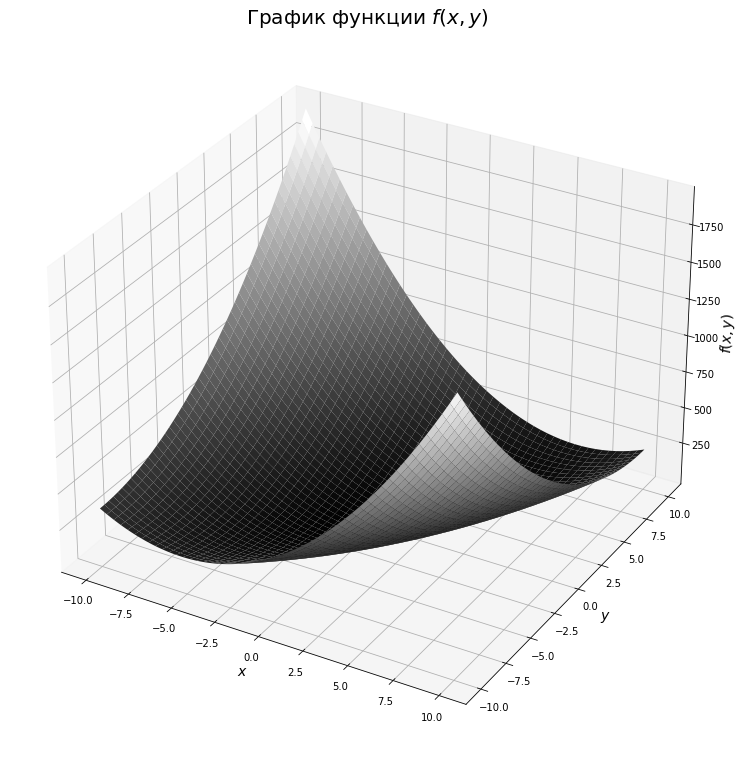

In [5]:
chart_x = np.linspace(-10, 10, num=1000)
chart_y = np.linspace(-10, 10, num=1000)

g_chart_x, g_chart_y = np.meshgrid(chart_x, chart_y)
chart_z = f(g_chart_x, g_chart_y)

fig = plt.figure(figsize=(14, 10))
ax = Axes3D(fig)
ax.plot_surface(g_chart_x, g_chart_y, chart_z, cmap=cm.binary_r);
ax.set_xlabel('$x$', fontsize=14);
ax.set_ylabel('$y$', fontsize=14);
ax.set_zlabel('$f(x, y)$', fontsize=14);
ax.set_title("График функции $f (x, y)$", fontsize=20);

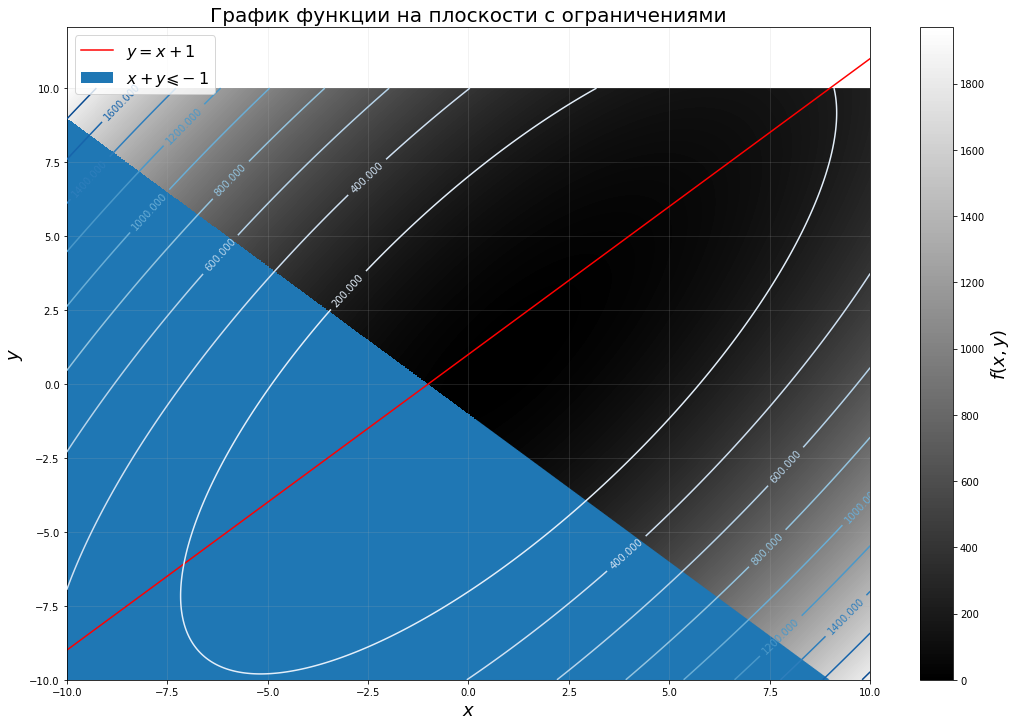

In [6]:

fig, ax = plt.subplots(figsize=(18, 12))
ax.set_xlabel("$x$", fontsize=18)
ax.set_ylabel("$y$", fontsize=18)
ax.set_title("График функции на плоскости c ограничениями", fontsize=20)
contourf = ax.contourf(chart_x, chart_y, chart_z, levels=200, cmap=cm.binary_r)
color_bar = fig.colorbar(contourf)
color_bar.set_label("$f(x, y)$", fontsize=18)
plt.fill_between(g_chart_x.flatten(), g_chart_y.flatten(),-10,  where=h_bool[0](g_chart_x.flatten(), g_chart_y.flatten()), label='$x + y \leqslant -1$')
chart_y = np.linspace(-10, 10, num=1000)
plt.plot(chart_x, chart_y + 1 , color='r', label='$y = x + 1$')
chart_y = np.linspace(-10, 10, num=1000)
contour = ax.contour(chart_x, chart_y, chart_z, cmap=cm.Blues, levels=10, zorder=3)
plt.clabel(contour, zorder=2)
plt.grid(zorder=1, alpha=0.2)
plt.legend(fontsize=16);


### Штрафные функции

In [7]:
def penalty(hi, x, y):
    return np.max([0, hi(x, y)])**2

def penalty2(hi, x, y):
    return np.max([0, hi(x, y)])**4

In [8]:
def Q(X, r):
    global func_calls
    func_calls += 1
    n = len(h)
    return f(*X) + r * np.sum(np.array([penalty(h[i], *X) for i in range(n)]))
def Q1(X, r):
    global func_calls
    func_calls += 1
    n = len(h)
    return f(*X) + r * np.sum(np.array([penalty2(h[i], *X) for i in range(n)]))

### Программная реализация метода

In [9]:
def penalty_functions_method1(start_point, precision, r, r_rate):
    X_history = [start_point]
    global func_calls
    func_calls = 0

    while True:
        opti_result = minimize(Q, X_history[-1], args=(r), method='Powell')
        X_next = opti_result.x
        X_history.append(X_next)

        if Q(X_history[-1], r) - f(*X_history[-1]) <= precision:
            return X_history

        r += r * r_rate
        
def penalty_functions_method2(start_point, precision, r, r_rate):
    X_history = [start_point]
    global func_calls
    func_calls = 0

    while True:
        opti_result = minimize(Q1, X_history[-1], args=(r), method='Powell')
        X_next = opti_result.x
        X_history.append(X_next)

        if Q(X_history[-1], r) - f(*X_history[-1]) <= precision:
            return X_history

        r += r * r_rate
        

In [10]:
columns = ['Штрафная ф-я', 'Нач. коэфф. штрафа', 'Стратегия изменения коэфф.', 'Нач. точка', 'Точность', 'Кол-во итераций', 'Кол-во выч. цел. ф-ии', 'x, y', 'f(x,y)']
table = pd.DataFrame(columns=columns)

### Вычисления

In [11]:
#1
start_point = [0, 0]
precision = 0.001
r = 1
r_rate = 0.5
arr = penalty_functions_method1(start_point, precision, r, r_rate)
iterationN = len(arr)
x, y = arr[len(arr) - 1]
fx = f(x, y)
table.loc[0] = [1, r, r_rate, start_point, precision, iterationN, func_calls, [x, y], fx]

In [12]:
#2
start_point = [0, 0]
precision = 0.001
r = 1
r_rate = 0.5
arr = penalty_functions_method2(start_point, precision, r, r_rate)
iterationN = len(arr)
x, y = arr[len(arr) - 1]
fx = f(x, y)
table.loc[1] = [2, r, r_rate, start_point, precision, iterationN, func_calls, [x, y], fx]

In [13]:
#3
start_point = [0, 0]
precision = 0.001
r = 50
r_rate = 0.5
arr = penalty_functions_method1(start_point, precision, r, r_rate)
iterationN = len(arr)
x, y = arr[len(arr) - 1]
fx = f(x, y)
table.loc[2] = [1, r, r_rate, start_point, precision, iterationN, func_calls, [x, y], fx]

In [14]:
#4
start_point = [0, 0]
precision = 0.001
r = 50
r_rate = 0.5
arr = penalty_functions_method2(start_point, precision, r, r_rate)
iterationN = len(arr)
x, y = arr[len(arr) - 1]
fx = f(x, y)
table.loc[3] = [2, r, r_rate, start_point, precision, iterationN, func_calls, [x, y], fx]

In [15]:
#5
start_point = [0, 0]
precision = 0.001
r = 1
r_rate = 0.1
arr = penalty_functions_method1(start_point, precision, r, r_rate)
iterationN = len(arr)
x, y = arr[len(arr) - 1]
fx = f(x, y)
table.loc[4] = [1, r, r_rate, start_point, precision, iterationN, func_calls, [x, y], fx]

In [16]:
#6
start_point = [0, 0]
precision = 0.001
r = 1
r_rate = 0.1
arr = penalty_functions_method2(start_point, precision, r, r_rate)
iterationN = len(arr)
x, y = arr[len(arr) - 1]
fx = f(x, y)
table.loc[5] = [2, r, r_rate, start_point, precision, iterationN, func_calls, [x, y], fx]

In [17]:
#7
start_point = [5, 1]
precision = 0.001
r = 1
r_rate = 0.5
arr = penalty_functions_method1(start_point, precision, r, r_rate)
iterationN = len(arr)
x, y = arr[len(arr) - 1]
fx = f(x, y)
table.loc[6] = [1, r, r_rate, start_point, precision, iterationN, func_calls, [x, y], fx]

In [18]:
#8
start_point = [5, 1]
precision = 0.001
r = 1
r_rate = 0.5
arr = penalty_functions_method2(start_point, precision, r, r_rate)
iterationN = len(arr)
x, y = arr[len(arr) - 1]
fx = f(x, y)
table.loc[7] = [2, r, r_rate, start_point, precision, iterationN, func_calls, [x, y], fx]


In [19]:
#9
start_point = [0, 0]
precision = 0.1
r = 1
r_rate = 0.5
arr = penalty_functions_method1(start_point, precision, r, r_rate)
iterationN = len(arr)
x, y = arr[len(arr) - 1]
fx = f(x, y)
table.loc[8] = [1, r, r_rate, start_point, precision, iterationN, func_calls, [x, y], fx]

In [20]:
#10
start_point = [0, 0]
precision = 0.1
r = 1
r_rate = 0.5
arr = penalty_functions_method2(start_point, precision, r, r_rate)
iterationN = len(arr)
x, y = arr[len(arr) - 1]
fx = f(x, y)
table.loc[9] = [2, r, r_rate, start_point, precision, iterationN, func_calls, [x, y], fx]
table

,Штрафная ф-я,Нач. коэфф. штрафа,Стратегия изменения коэфф.,Нач. точка,Точность,Кол-во итераций,Кол-во выч. цел. ф-ии,"x, y","f(x,y)"
0,1,1,0.5,"[0, 0]",0.001,23,1888,"[-0.27093391100008524, -0.7286989874586952]",5.684014
1,2,1,0.5,"[0, 0]",0.001,196,17055,"[-0.2764076540002519, -0.7235923460030272]",5.687546
2,1,50,0.5,"[0, 0]",0.001,13,827,"[-0.27323686266867786, -0.7263442280107715]",5.684621
3,2,50,0.5,"[0, 0]",0.001,186,16281,"[-0.27610451342219355, -0.7238954865808038]",5.687395
4,1,1,0.1,"[0, 0]",0.001,88,3841,"[-0.26840053714405177, -0.7310894534756829]",5.682844
5,2,1,0.1,"[0, 0]",0.001,812,63602,"[-0.2686561077998608, -0.7313438922005144]",5.684785
6,1,1,0.5,"[5, 1]",0.001,23,1868,"[-0.27093391064515826, -0.7286989878130563]",5.684014
7,2,1,0.5,"[5, 1]",0.001,196,17063,"[-0.27640765427483727, -0.723592345728442]",5.687546
8,1,1,0.5,"[0, 0]",0.100,11,1070,"[-0.2427411271676758, -0.7087690498200643]",5.501945
9,2,1,0.5,"[0, 0]",0.100,196,17055,"[-0.2764076540002519, -0.7235923460030272]",5.687546


# Выводы
### Чем больше штраф накладывается штрафной функцией на целевую, тем больше приходиться вычислять целевую функцию. Чем больше начальный коэффициент штрафа, тем меньше количество итераций метода и меньше приходиться вычислять целевую функцию. При уменьшении стратегии изменения коэффициента увеличивается количество итераций и вычислений функции. Изменение начальной точки почти не влияет на количество итераций и количество вычислений функции.